# Loading required packages



In [0]:
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import io    #import data

%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import math 

# Loading data

In [406]:
from google.colab import files
uploaded = files.upload()    #import the file from your computer

Saving DATA2.csv to DATA2 (4).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['DATA2.csv']), sep=';', decimal='.') #read the datafile
dataset = df.values

X = dataset[:,0:3].astype(int)       #first column is the feature
Y_max = dataset[:,3]    #2nd column is Y_max label
Y_avg = dataset[:,4]    #3rd column is Y_avg label
Y_min = dataset[:,5]    #4th column is Y_min label

X_train, X_test, Y_train_max, Y_test_max = train_test_split(X,Y_max,test_size=0.1,shuffle=False)
X_train, X_test, Y_train_avg, Y_test_avg = train_test_split(X,Y_avg,test_size=0.1,shuffle=False)
X_train, X_test, Y_train_min, Y_test_min = train_test_split(X,Y_min,test_size=0.1,shuffle=False)

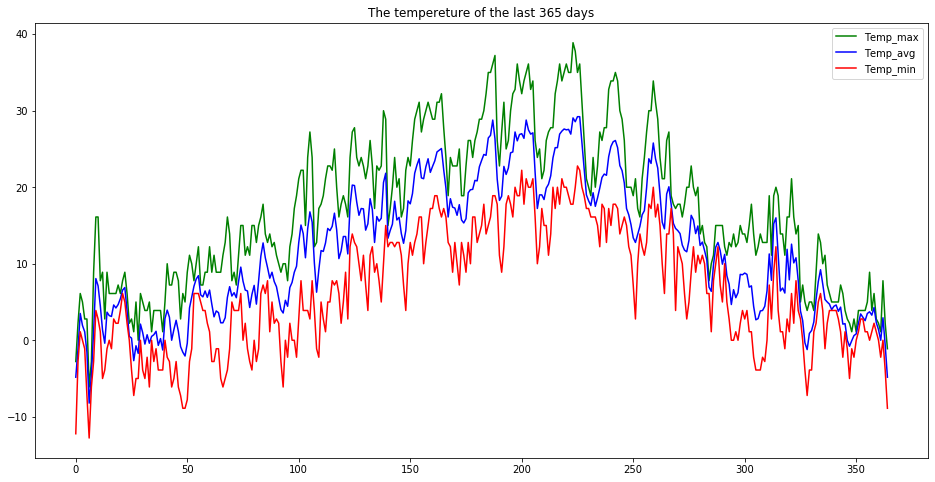

In [408]:
#visualization of data
plt.figure(figsize=(16,8))
plt.plot(Y_max[0:365], color="green", label= 'Temp_max')
plt.plot(Y_avg[0:365], color="blue", label= 'Temp_avg')
plt.plot(Y_min[0:365], color="red", label= 'Temp_min')
plt.legend(loc='upper right')
plt.title("The tempereture of the last 365 days")
plt.show()

# New lists for the better visualisation

In [0]:
X_ty = np.zeros((73, 3),dtype = 'int')    #array of the days in this year (~ every month is 31 days)
X_ny = np.zeros((373, 3),dtype = 'int')    #array of the days in the next day (372 = 12*31 + 1 [2019.12.31: "continous" function])

for i in range(21,33):    #the days between 2019.10.21-2019.10.31
    X_ty[i-21,0] = 2019
    X_ty[i-21,1] = 10
    X_ty[i-21,2] = i

#array of the days between 2019.11.1-2019.12.31
for y in range(0,2):    #2 months   
    for x in range(1, 32):    #31 days
        X_ty[y*31+x+10,0] = 2019    #the indexing: 10 days after 2019.10.21, x is the day and y*31 because of month changing
        X_ty[y*31+x+10,1] = y+11
        X_ty[y*31+x+10,2] = x


X_ny[0,0] = 2019
X_ny[0,1] = 12
X_ny[0,2] = 31

#array of the days between 2020.01.01-2020.12.31
for y in range(1,13): 
    for x in range(1, 32):
        X_ny[(y-1)*31+x,0] = 2020
        X_ny[(y-1)*31+x,1] = y
        X_ny[(y-1)*31+x,2] = x

In [0]:
ax1_tr = []    #the number of days from 2019.10.21 between 2015.01.01 and 2019.04.28 (last elemet of the training set)
ax1_te = []    #the number of days from 2019.10.21 between 2015.04.29 (first element of the test set) and 2019.10.21
ax2 = []    #the number of days from 2019.10.21 between 2019.10.21 and 2019.12.31
ax3 = []    #the number of days from 2019.10.21 between 2019.10.21 and 2019.12.31

for i in range(0,176):
    ax1_te.append(-176+i+1)    #-175 - 0   (test set)

for i in range(0,1579):    #-1755 - -176    (training set)
    ax1_tr.append(-1755+i)

for i in range(0,73):    # 0 - 72    (this year)
    ax2.append(i)

for i in range(0,373):    #72 - 455 (2019.12.31+next year)
    ax3.append(i+72)

#Defining the model

In [0]:
model = Sequential()    #model of Y_avg, I tested more network, but i have to use very large to get good results; followed the rule to decrese the number of the neurons in the layer near the output
model.add(Dense(25, input_dim=3, kernel_initializer='normal', activation='relu'))    #1st hidden layer
model.add(Dense(20, kernel_initializer='normal', activation='relu'))    #2nd hidden layer
model.add(Dense(15, kernel_initializer='normal', activation='relu'))    #3rd hidden layer
model.add(Dense(10, kernel_initializer='normal', activation='relu'))    #4th hidden layer
model.add(Dense(1, kernel_initializer='normal'))    #output layer

model.compile(loss='mean_squared_error', optimizer='adam') #MSE loss function and adam optimizer 

# Model evaluation


In [412]:
#learning phase of the Y_avg label
history = model.fit(X_train, Y_train_avg, 
                    epochs=250, 
                    batch_size=5,
                    verbose=2,
                    validation_data=(X_test, Y_test_avg)) 

Train on 1579 samples, validate on 176 samples
Epoch 1/250
 - 5s - loss: 93.8888 - val_loss: 91.1549
Epoch 2/250
 - 1s - loss: 80.0081 - val_loss: 58.2259
Epoch 3/250
 - 1s - loss: 80.1628 - val_loss: 79.8665
Epoch 4/250
 - 1s - loss: 80.3301 - val_loss: 62.4739
Epoch 5/250
 - 1s - loss: 79.6404 - val_loss: 64.3671
Epoch 6/250
 - 1s - loss: 80.2699 - val_loss: 87.7343
Epoch 7/250
 - 1s - loss: 80.3381 - val_loss: 104.6875
Epoch 8/250
 - 1s - loss: 80.0978 - val_loss: 98.2721
Epoch 9/250
 - 1s - loss: 79.8610 - val_loss: 62.4146
Epoch 10/250
 - 1s - loss: 79.6650 - val_loss: 77.1135
Epoch 11/250
 - 1s - loss: 79.2661 - val_loss: 65.5517
Epoch 12/250
 - 1s - loss: 79.7206 - val_loss: 79.2108
Epoch 13/250
 - 1s - loss: 79.9239 - val_loss: 95.4829
Epoch 14/250
 - 1s - loss: 79.3494 - val_loss: 79.5360
Epoch 15/250
 - 1s - loss: 79.7244 - val_loss: 90.6217
Epoch 16/250
 - 1s - loss: 79.4944 - val_loss: 74.9447
Epoch 17/250
 - 1s - loss: 78.9030 - val_loss: 78.2193
Epoch 18/250
 - 1s - loss:

# Results

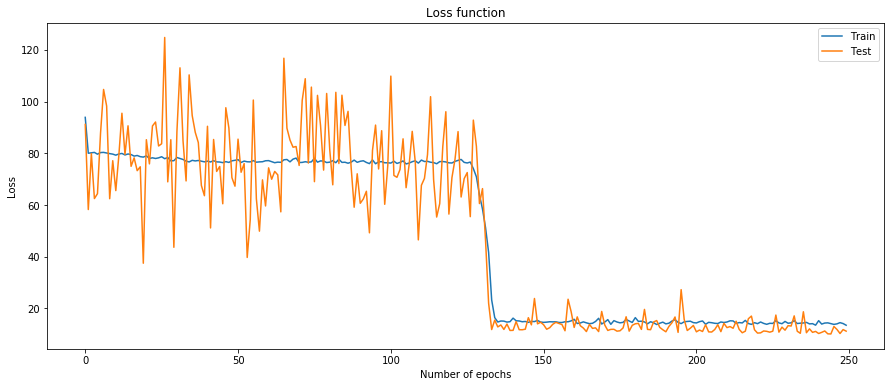

In [413]:
train_loss = model.evaluate(X,Y_avg,verbose=0)
plt.figure(figsize=(15,6))
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [414]:
print("The last training MSE is ",history.history['loss'][-1])
print("This means our prediction is in +/- ",math.sqrt(history.history['loss'][-1]), "interval to the real label")

print("The last test MSE is ",history.history['loss'][-1])
print("This means our prediction is in +/- ",math.sqrt(history.history['val_loss'][-1]), "interval to the real label")

The last training MSE is  13.457108574777257
This means our prediction is in +/-  3.668393187047601 interval to the real label
The last test MSE is  13.457108574777257
This means our prediction is in +/-  3.3416377306536766 interval to the real label


# Prediction

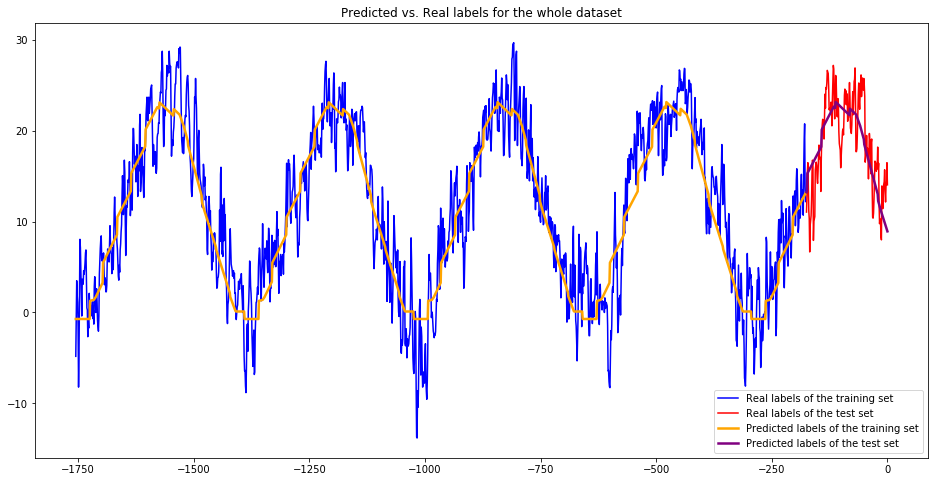

In [415]:
plt.figure(figsize=(16,8))
plt.plot(ax1_tr,Y_train_avg, color="blue", label = 'Real labels of the training set')
plt.plot(ax1_te,Y_test_avg, color="red", label = 'Real labels of the test set')
plt.plot(ax1_tr,model.predict(X_train), color="orange",linewidth = 2.5, label = 'Predicted labels of the training set')
plt.plot(ax1_te,model.predict(X_test), color="purple",linewidth = 2.5, label = 'Predicted labels of the test set')
plt.legend(loc='lower right')
plt.title("Predicted vs. Real labels for the whole dataset")
plt.show()

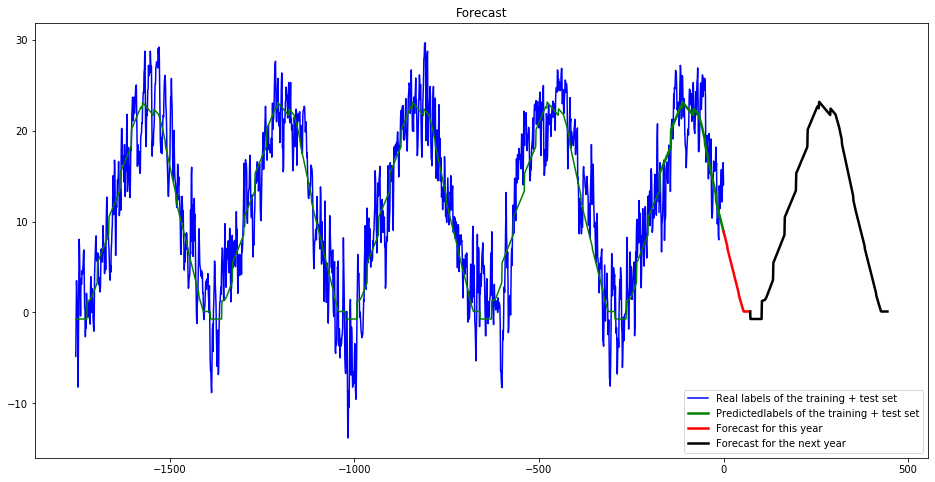

In [416]:
plt.figure(figsize=(16,8))
plt.plot(ax1_te,Y_test_avg, color="blue", label = 'Real labels of the training + test set')
plt.plot(ax1_te,model.predict(X_test), color="green",linewidth = 2.5, label = 'Predictedlabels of the training + test set')
plt.plot(ax1_tr,Y_train_avg, color="blue")
plt.plot(ax1_tr,model.predict(X_train), color="green")
plt.plot(ax2,model.predict(X_ty), color="red",linewidth = 2.5, label = 'Forecast for this year')
plt.plot(ax3,model.predict(X_ny), color="black",linewidth = 2.5, label = 'Forecast for the next year')
plt.legend(loc='lower right')
plt.title("Forecast")
plt.show()

In [417]:
X_valid = np.array([[2019,10,30],[2019,11,5],[2019,11,26]])
print("The average temperature on 2019.10.30: ",model.predict(X_valid)[0])
print("The average temperature on 2019.11.5: ",model.predict(X_valid)[1])
print("The average temperature on 2019.11.26: ",model.predict(X_valid)[2])

The average temperature on 2019.10.30:  [7.488486]
The average temperature on 2019.11.5:  [6.3276687]
The average temperature on 2019.11.26:  [2.9466739]


# Bonus: Y_max

In [0]:
model2 = Sequential()    #model of Y_max, I tested more network, but i have to use very large to get good results; followed the rule to decrese the number of the neurons in the layer near the output
model2.add(Dense(25, input_dim=3, kernel_initializer='normal', activation='relu'))    #1st hidden layer
model2.add(Dense(20, kernel_initializer='normal', activation='relu'))    #2nd hidden layer
model2.add(Dense(15, kernel_initializer='normal', activation='relu'))    #3rd hidden layer
model2.add(Dense(10, kernel_initializer='normal', activation='relu'))    #4th hidden layer
model2.add(Dense(1, kernel_initializer='normal'))    #output layer

model2.compile(loss='mean_squared_error', optimizer='adam') #MSE loss function and adam optimizer 

In [419]:
#learning phase of the Y_avg label
history2 = model2.fit(X_train, Y_train_max, 
                    epochs=250, 
                    batch_size=5,
                    verbose=2,
                    validation_data=(X_test, Y_test_max)) 

Train on 1579 samples, validate on 176 samples
Epoch 1/250
 - 5s - loss: 133.6380 - val_loss: 91.4961
Epoch 2/250
 - 1s - loss: 103.3774 - val_loss: 86.6873
Epoch 3/250
 - 1s - loss: 104.1551 - val_loss: 108.2062
Epoch 4/250
 - 1s - loss: 104.9454 - val_loss: 114.5301
Epoch 5/250
 - 1s - loss: 104.4957 - val_loss: 91.2230
Epoch 6/250
 - 1s - loss: 104.3157 - val_loss: 134.7072
Epoch 7/250
 - 1s - loss: 103.3554 - val_loss: 76.2990
Epoch 8/250
 - 1s - loss: 103.0464 - val_loss: 124.4297
Epoch 9/250
 - 1s - loss: 102.6860 - val_loss: 83.0375
Epoch 10/250
 - 1s - loss: 103.6733 - val_loss: 98.1365
Epoch 11/250
 - 1s - loss: 104.5898 - val_loss: 85.2077
Epoch 12/250
 - 1s - loss: 103.7010 - val_loss: 103.0008
Epoch 13/250
 - 1s - loss: 103.2457 - val_loss: 79.4817
Epoch 14/250
 - 1s - loss: 103.6755 - val_loss: 107.1395
Epoch 15/250
 - 1s - loss: 103.8056 - val_loss: 125.5384
Epoch 16/250
 - 1s - loss: 104.1071 - val_loss: 100.4337
Epoch 17/250
 - 1s - loss: 103.4207 - val_loss: 108.7797
E

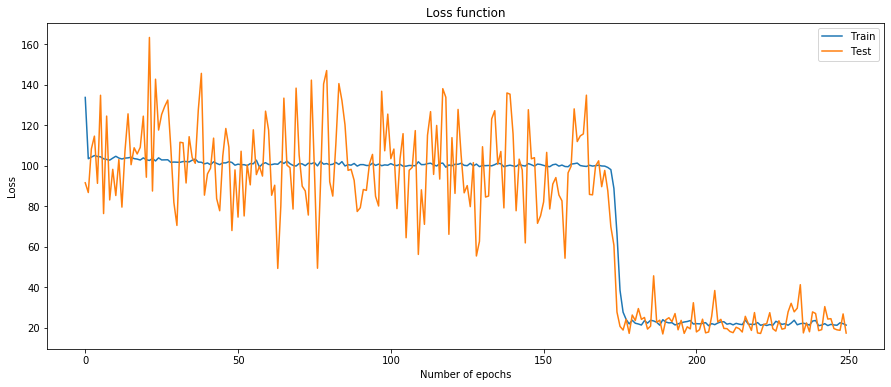

In [420]:
train_loss = model2.evaluate(X,Y_max,verbose=0)
plt.figure(figsize=(15,6))
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [421]:
print("The last training MSE is ",history2.history['loss'][-1])
print("This means our prediction is in +/- ",math.sqrt(history2.history['loss'][-1]), "interval to the real label")

print("The last test MSE is ",history2.history['loss'][-1])
print("This means our prediction is in +/- ",math.sqrt(history2.history['val_loss'][-1]), "interval to the real label")

The last training MSE is  21.212087582756705
This means our prediction is in +/-  4.605658213844869 interval to the real label
The last test MSE is  21.212087582756705
This means our prediction is in +/-  4.157790710998391 interval to the real label


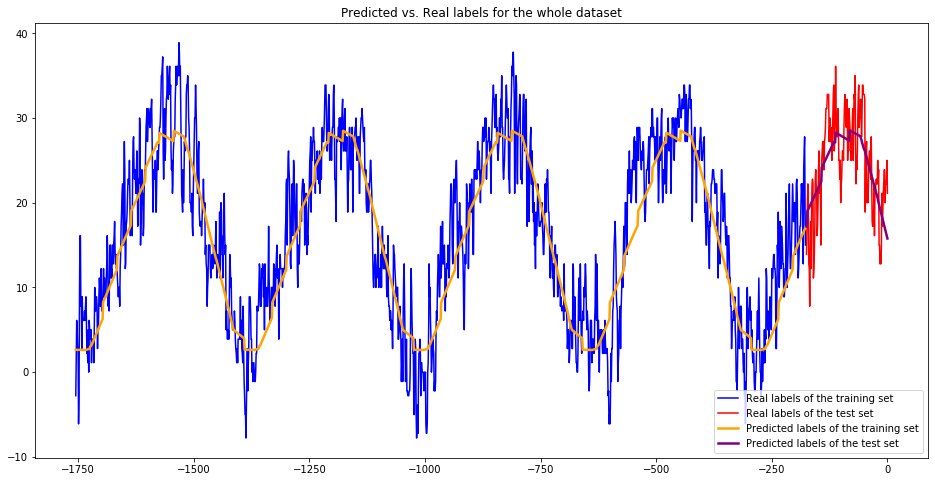

In [422]:
plt.figure(figsize=(16,8))
plt.plot(ax1_tr,Y_train_max, color="blue", label = 'Real labels of the training set')
plt.plot(ax1_te,Y_test_max, color="red", label = 'Real labels of the test set')
plt.plot(ax1_tr,model2.predict(X_train), color="orange",linewidth = 2.5, label = 'Predicted labels of the training set')
plt.plot(ax1_te,model2.predict(X_test), color="purple",linewidth = 2.5, label = 'Predicted labels of the test set')
plt.legend(loc='lower right')
plt.title("Predicted vs. Real labels for the whole dataset")
plt.show()

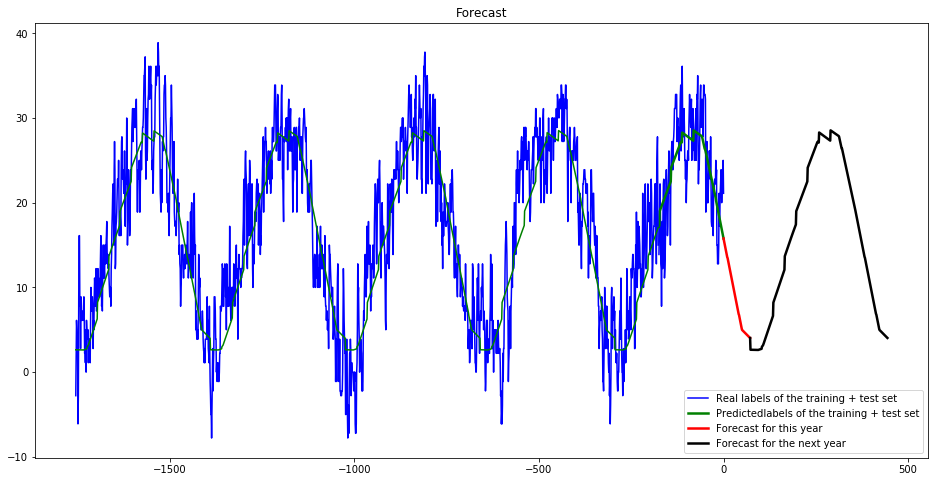

In [423]:
plt.figure(figsize=(16,8))
plt.plot(ax1_te,Y_test_max, color="blue", label = 'Real labels of the training + test set')
plt.plot(ax1_te,model2.predict(X_test), color="green",linewidth = 2.5, label = 'Predictedlabels of the training + test set')
plt.plot(ax1_tr,Y_train_max, color="blue")
plt.plot(ax1_tr,model2.predict(X_train), color="green")
plt.plot(ax2,model2.predict(X_ty), color="red",linewidth = 2.5, label = 'Forecast for this year')
plt.plot(ax3,model2.predict(X_ny), color="black",linewidth = 2.5, label = 'Forecast for the next year')
plt.legend(loc='lower right')
plt.title("Forecast")
plt.show()

In [424]:
X_valid = np.array([[2019,10,30],[2019,11,5],[2019,11,26]])
print("The maximum temperature on 2019.10.30: ",model2.predict(X_valid)[0])
print("The maximum temperature on 2019.11.5: ",model2.predict(X_valid)[1])
print("The maximum temperature on 2019.11.26: ",model2.predict(X_valid)[2])

The maximum temperature on 2019.10.30:  [13.790535]
The maximum temperature on 2019.11.5:  [12.581112]
The maximum temperature on 2019.11.26:  [7.9488335]


# Bonus2: Y_min

In [0]:
model3 = Sequential()    #model of Y_avg, I tested more network, but i have to use very large to get good results; followed the rule to decrese the number of the neurons in the layer near the output
model3.add(Dense(25, input_dim=3, kernel_initializer='normal', activation='relu'))    #1st hidden layer
model3.add(Dense(20, kernel_initializer='normal', activation='relu'))    #2nd hidden layer
model3.add(Dense(15, kernel_initializer='normal', activation='relu'))    #3rd hidden layer
model3.add(Dense(10, kernel_initializer='normal', activation='relu'))    #4th hidden layer
model3.add(Dense(1, kernel_initializer='normal'))    #output layer

model3.compile(loss='mean_squared_error', optimizer='adam') #MSE loss function and adam optimizer 

In [426]:
#learning phase of the Y_avg label
history3 = model3.fit(X_train, Y_train_min, 
                    epochs=250, 
                    batch_size=5,
                    verbose=2,
                    validation_data=(X_test, Y_test_min)) 

Train on 1579 samples, validate on 176 samples
Epoch 1/250
 - 6s - loss: 69.7451 - val_loss: 73.2102
Epoch 2/250
 - 1s - loss: 67.4825 - val_loss: 57.2490
Epoch 3/250
 - 1s - loss: 67.4953 - val_loss: 88.0759
Epoch 4/250
 - 1s - loss: 66.7631 - val_loss: 63.4581
Epoch 5/250
 - 1s - loss: 67.1660 - val_loss: 91.9234
Epoch 6/250
 - 1s - loss: 67.4384 - val_loss: 84.8835
Epoch 7/250
 - 1s - loss: 66.9490 - val_loss: 98.4264
Epoch 8/250
 - 1s - loss: 67.0650 - val_loss: 74.9241
Epoch 9/250
 - 1s - loss: 67.6035 - val_loss: 63.3192
Epoch 10/250
 - 1s - loss: 66.9152 - val_loss: 85.3473
Epoch 11/250
 - 1s - loss: 67.1346 - val_loss: 69.8690
Epoch 12/250
 - 1s - loss: 67.1377 - val_loss: 86.8482
Epoch 13/250
 - 1s - loss: 66.7427 - val_loss: 66.4386
Epoch 14/250
 - 1s - loss: 66.6676 - val_loss: 87.4234
Epoch 15/250
 - 1s - loss: 66.5636 - val_loss: 74.3680
Epoch 16/250
 - 1s - loss: 66.5599 - val_loss: 79.6351
Epoch 17/250
 - 1s - loss: 66.6197 - val_loss: 78.2275
Epoch 18/250
 - 1s - loss: 

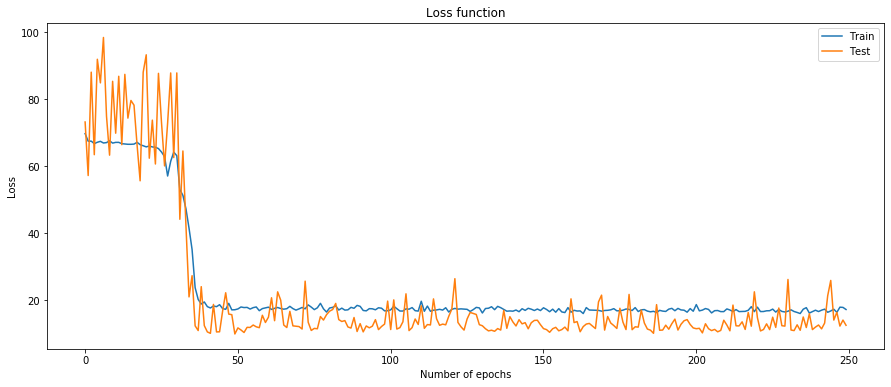

In [427]:
train_loss = model3.evaluate(X,Y_min,verbose=0)
plt.figure(figsize=(15,6))
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [428]:
print("The last training MSE is ",history3.history['loss'][-1])
print("This means our prediction is in +/- ",math.sqrt(history3.history['loss'][-1]), "interval to the real label")

print("The last test MSE is ",history3.history['loss'][-1])
print("This means our prediction is in +/- ",math.sqrt(history3.history['val_loss'][-1]), "interval to the real label")

The last training MSE is  17.28052421843726
This means our prediction is in +/-  4.156984991365408 interval to the real label
The last test MSE is  17.28052421843726
This means our prediction is in +/-  3.545028708988323 interval to the real label


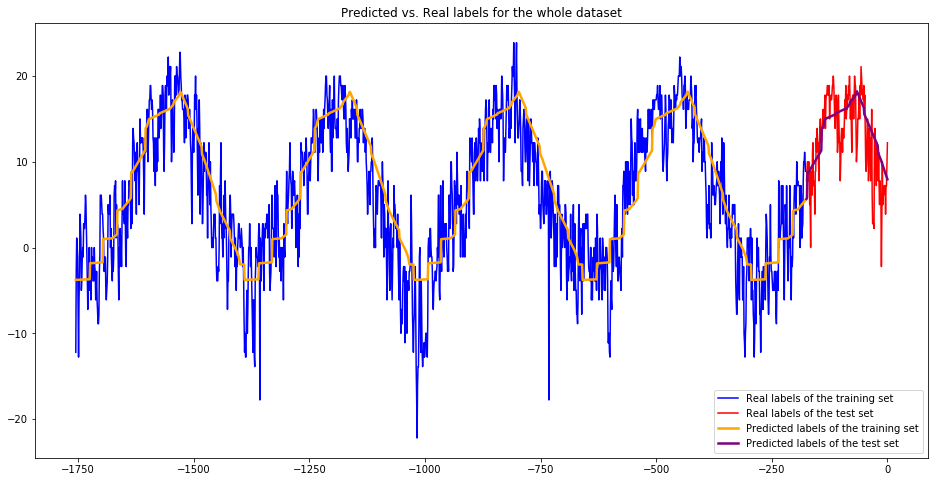

In [429]:
plt.figure(figsize=(16,8))
plt.plot(ax1_tr,Y_train_min, color="blue", label = 'Real labels of the training set')
plt.plot(ax1_te,Y_test_min, color="red", label = 'Real labels of the test set')
plt.plot(ax1_tr,model3.predict(X_train), color="orange",linewidth = 2.5, label = 'Predicted labels of the training set')
plt.plot(ax1_te,model3.predict(X_test), color="purple",linewidth = 2.5, label = 'Predicted labels of the test set')
plt.legend(loc='lower right')
plt.title("Predicted vs. Real labels for the whole dataset")
plt.show()

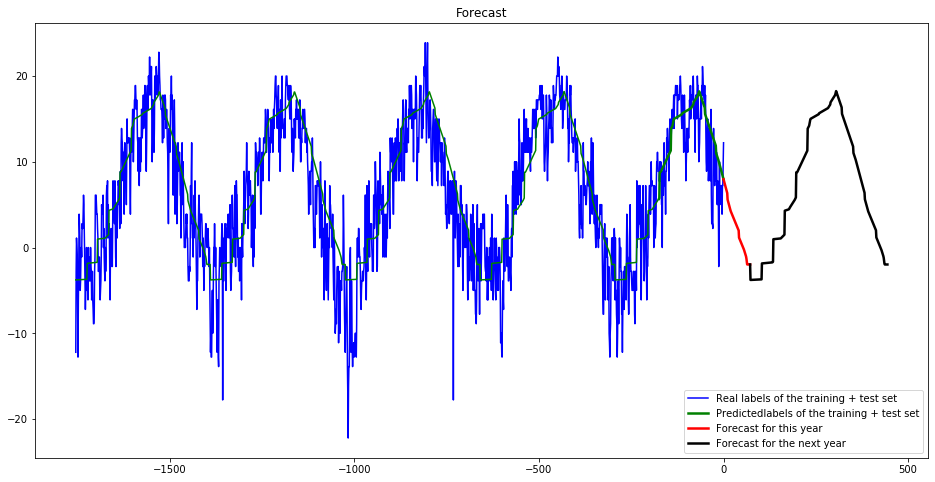

In [430]:
plt.figure(figsize=(16,8))
plt.plot(ax1_te,Y_test_min, color="blue", label = 'Real labels of the training + test set')
plt.plot(ax1_te,model3.predict(X_test), color="green",linewidth = 2.5, label = 'Predictedlabels of the training + test set')
plt.plot(ax1_tr,Y_train_min, color="blue")
plt.plot(ax1_tr,model3.predict(X_train), color="green")
plt.plot(ax2,model3.predict(X_ty), color="red",linewidth = 2.5, label = 'Forecast for this year')
plt.plot(ax3,model3.predict(X_ny), color="black",linewidth = 2.5, label = 'Forecast for the next year')
plt.legend(loc='lower right')
plt.title("Forecast")
plt.show()

In [431]:
X_valid = np.array([[2019,10,30],[2019,11,5],[2019,11,26]])
print("The minimum temperature on 2019.10.30: ",model3.predict(X_valid)[0])
print("The minimum temperature on 2019.11.5: ",model3.predict(X_valid)[1])
print("The minimum temperature on 2019.11.26: ",model3.predict(X_valid)[2])

The minimum temperature on 2019.10.30:  [6.5103164]
The minimum temperature on 2019.11.5:  [4.94352]
The minimum temperature on 2019.11.26:  [2.5050054]


#Conclusion

In [432]:
#The forecasts again
X_valid = np.array([[2019,10,30],[2019,11,5],[2019,11,26]])
print("The minimum temperature on 2019.10.30: ",model3.predict(X_valid)[0])
print("The average temperature on 2019.10.30: ",model.predict(X_valid)[0])
print("The maximum temperature on 2019.10.30: ",model2.predict(X_valid)[0])
print("\n")

print("The minimum temperature on 2019.11.5: ",model3.predict(X_valid)[1])
print("The average temperature on 2019.11.5: ",model.predict(X_valid)[1])
print("The maximum temperature on 2019.11.5: ",model2.predict(X_valid)[1])
print("\n")

print("The minimum temperature on 2019.11.26: ",model3.predict(X_valid)[2])
print("The average temperature on 2019.11.26: ",model.predict(X_valid)[2])
print("The maximum temperature on 2019.11.26: ",model2.predict(X_valid)[2])

The minimum temperature on 2019.10.30:  [6.5103164]
The average temperature on 2019.10.30:  [7.488486]
The maximum temperature on 2019.10.30:  [13.790535]


The minimum temperature on 2019.11.5:  [4.94352]
The average temperature on 2019.11.5:  [6.3276687]
The maximum temperature on 2019.11.5:  [12.581112]


The minimum temperature on 2019.11.26:  [2.5050054]
The average temperature on 2019.11.26:  [2.9466739]
The maximum temperature on 2019.11.26:  [7.9488335]
